### Import Libraries

In [35]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
from scipy.special import expit # numerically stable sigmoid


### Load the dataset

In [36]:
bc=datasets.load_breast_cancer()
X,y=bc.data,bc.target
print(bc.feature_names)
print(X.shape)
print(y.shape)
scaler=StandardScaler()
X=scaler.fit_transform(X)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(569, 30)
(569,)


### Data Visualization

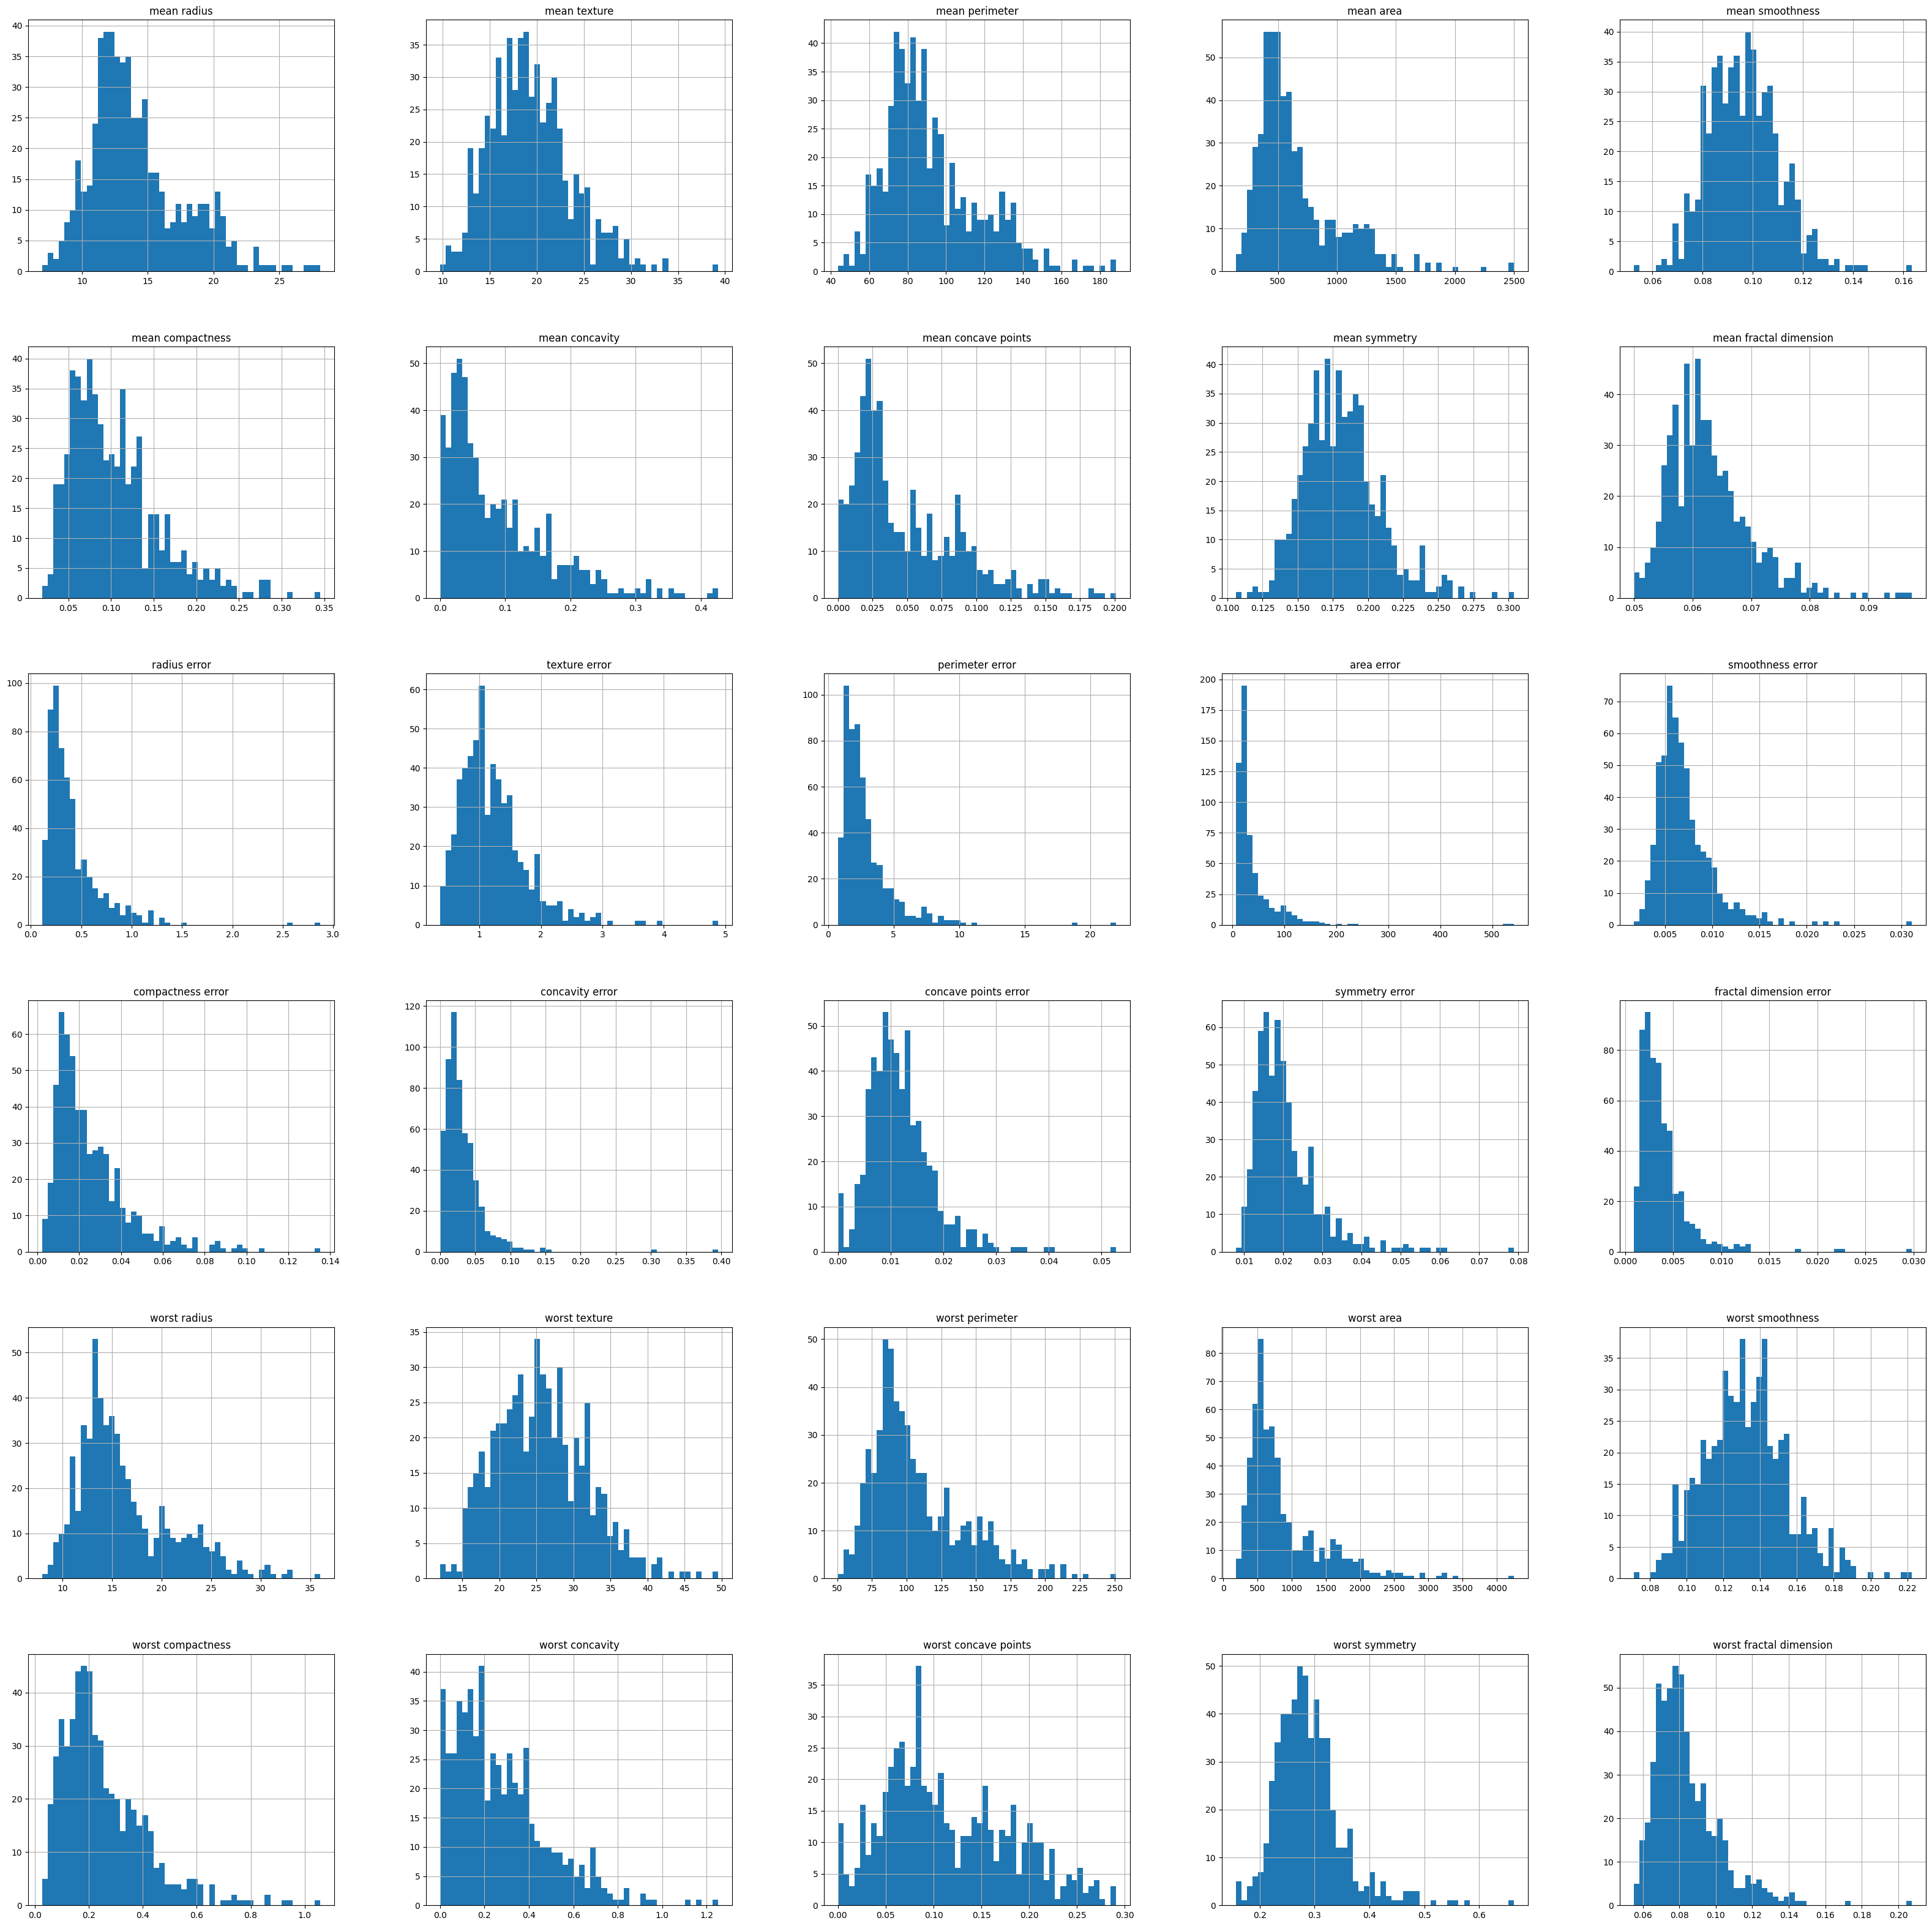

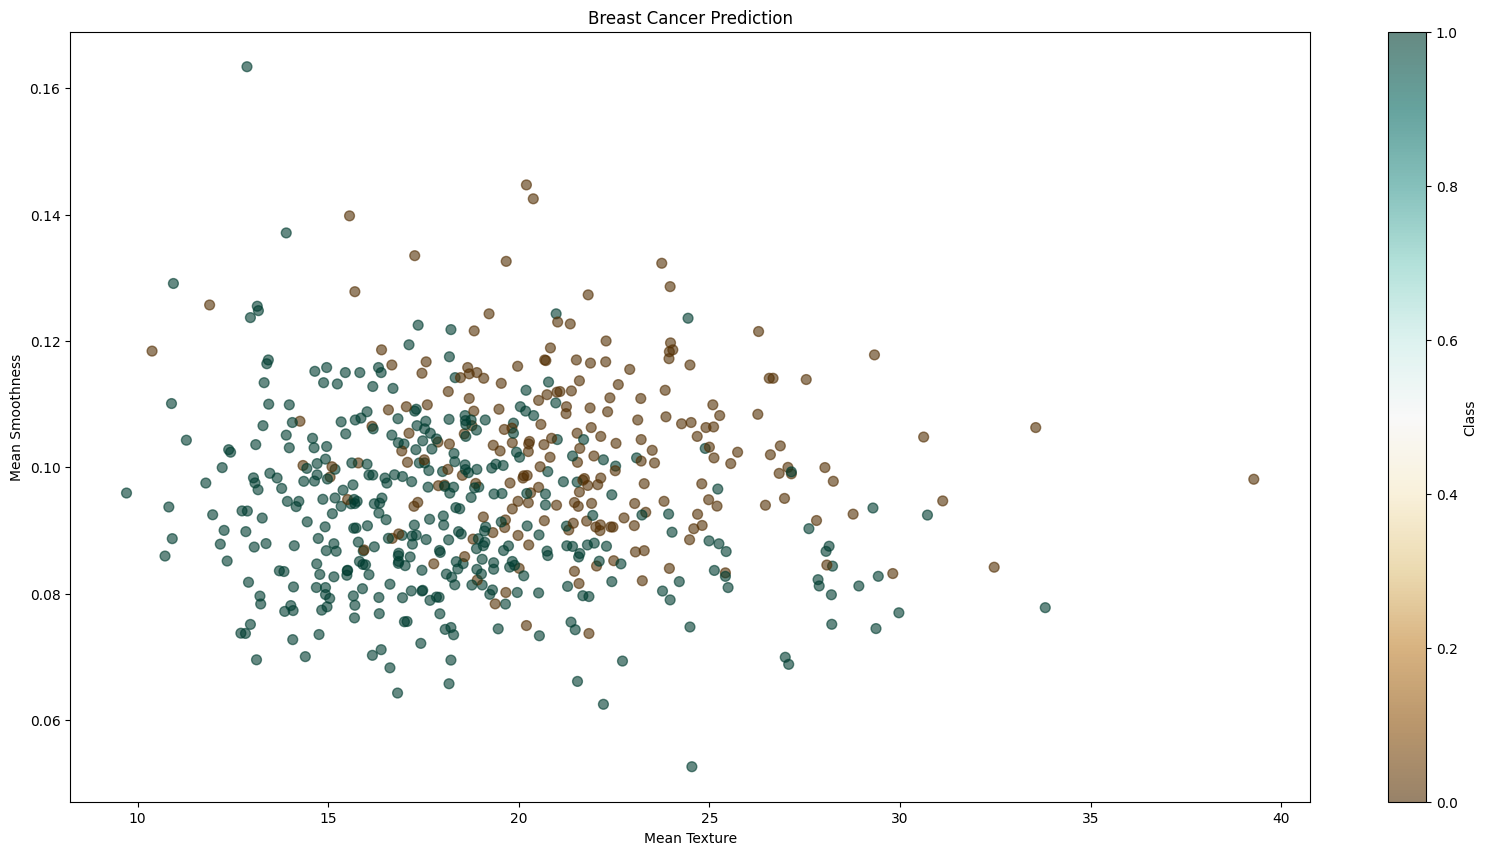

In [37]:
X_vis=pd.DataFrame(bc['data'],columns=bc['feature_names'])
y_vis=pd.DataFrame(bc['target'],columns=['target'])

X_vis.hist(bins=50,figsize=(40,40))
plt.figure(figsize=(20,10))

plt.scatter(X_vis["mean texture"],X_vis["mean smoothness"],c=y_vis["target"],cmap="BrBG", s=50, alpha=0.6)

plt.colorbar(label="Class")
plt.xlabel("Mean Texture")
plt.ylabel("Mean Smoothness")
plt.title("Breast Cancer Prediction")
plt.show()

### Logistic Regression Model

In [38]:
#define logistic regression model
def sigmoid(x):
  return expit(x)

class LogisticRegression:

  def __init__(self,lr=0.001,n_iters=1000):
    self.lr=lr
    self.n_iters=n_iters
    self.weights=None
    self.bias=None

  def fit(self,X,y): # for training
    n_samples,n_features=X.shape
    self.weights=np.zeros(n_features)
    self.bias=0
    for _ in range(self.n_iters):
      linear_pred=np.dot(X,self.weights)+self.bias
      y_pred=sigmoid(linear_pred)
      dw=(1/n_samples)*np.dot(X.T,(y_pred-y))
      db=(1/n_samples)*np.sum(y_pred-y)
      self.weights=self.weights-self.lr*dw
      self.bias=self.bias-self.lr*db


  def predict(self,X): # for testing
    print(f"Weights: {self.weights}")
    print(f"Bias: {self.bias}")
    linear_pred=np.dot(X,self.weights)+self.bias
    y_pred=sigmoid(linear_pred)
    class_pred=[0 if y<=0.5 else 1 for y in y_pred]
    return class_pred


### Predicting the result

In [43]:
X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

classifier= LogisticRegression(lr=0.001)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

def accuracy(y_pred,y_test):
  accuracy=np.sum(y_pred==y_test)/len(y_test)
  return accuracy*100

print(f"Accuracy: {accuracy(y_pred,y_test):.2f}%")



Weights: [-0.15488291 -0.10412219 -0.1557366  -0.14888237 -0.0727327  -0.10109001
 -0.12754584 -0.15783271 -0.06040227  0.02988954 -0.1122442   0.00268574
 -0.10506082 -0.10723662  0.01692129 -0.01631456 -0.00594986 -0.05202265
  0.01204327  0.03044555 -0.16742435 -0.1196321  -0.16564323 -0.15532274
 -0.10065739 -0.1111261  -0.12511872 -0.16327552 -0.10246094 -0.05223926]
Bias: 0.09598178041410814
Accuracy: 97.37%


myst